In [0]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np

from tensorflow.keras import layers
from matplotlib import pyplot as plt 
import seaborn as sns

This work is following the steps of the tutorial 
https://www.tensorflow.org/tutorials/keras/regression

In [2]:
raw_data = pd.read_csv('./final_data_cleaned_fixed_starIDs.csv')
dataset = raw_data.copy()
print(dataset.columns)
dataset = dataset[[
       'velocity',
       'velocity_error', 'stellar_activity1', 'brad_doesnt_know',
       'total_counts', 'MIDPTFIN',
       'AZ', 'EL', 'AZENCPOS', 'ELENCPOS', 'AZENCVEL', 'ELENCVEL', 'AZFLWERR',
       'ELFLWERR','AVG_FWHM', 'M5WIND',
       'M5WINDAZ', 'TAVERAGE', 'TM1S210', 'TM2CAIR', 'delta_TAVERAGE','OFFSET_AZ', 'OFFSET_EL',
       'RMSOFFSET_AZ', 'RMSOFFSET_EL', 'AVGOFFSET_AZ', 'AVGOFFSET_EL','night_start_temperature',
'wind_dome_angle']]
dataset = dataset.dropna()
dataset = dataset.select_dtypes(include=['float64'])
dataset.tail()

Index(['DateTimeLocal', 'YearMonthDayHour', 'EpocSeconds',
       'exposure_begin_datetime', 'exposure_end_datetime', 'velocity',
       'velocity_error', 'stellar_activity1', 'stellar_activity2',
       'total_counts', 'brad_doesnt_know', 'DateTimeUTC', 'starID', 'MIDPTFIN',
       'AZ', 'EL', 'AZENCPOS', 'ELENCPOS', 'AZENCVEL', 'ELENCVEL', 'AZFLWERR',
       'ELFLWERR', 'OUTFILE', 'OBSNUM', 'MODE', 'AVG_FWHM', 'M5WIND',
       'M5WINDAZ', 'TAVERAGE', 'TM1S210', 'TM2CAIR', 'OFFSET_AZ', 'OFFSET_EL',
       'RMSOFFSET_AZ', 'RMSOFFSET_EL', 'AVGOFFSET_AZ', 'AVGOFFSET_EL',
       'HATCHPOS', 'night_start_temperature', 'night_start_TM1S210',
       'night_start_TM2CAIR', 'delta_TAVERAGE', 'delta_TM1S210',
       'delta_TM2CAIR', 'wind_dome_angle', 'starID_corrected'],
      dtype='object')


,velocity,velocity_error,stellar_activity1,brad_doesnt_know,total_counts,AZ,EL,AZENCPOS,ELENCPOS,AZENCVEL,ELENCVEL,AZFLWERR,ELFLWERR,AVG_FWHM,M5WIND,M5WINDAZ,TAVERAGE,TM1S210,TM2CAIR,delta_TAVERAGE,OFFSET_AZ,OFFSET_EL,RMSOFFSET_AZ,RMSOFFSET_EL,AVGOFFSET_AZ,AVGOFFSET_EL,night_start_temperature,wind_dome_angle
1307,2.88,1.18,0.1620,597.0,23109.0,3.8027,58.1503,-104594554.0,-23676490.0,-3311.0,267.0,4.0,1.0,8.077,4.0,332.0,15.04,16.65,14.14,-1.79,-0.041,-0.085,0.132,0.146,0.003,0.007,16.83,31.8027
1308,2.85,1.29,0.1631,622.0,23874.0,11.1343,56.9496,-95929510.0,-25096793.0,-2939.0,758.0,-4.0,2.0,9.300,6.0,219.0,13.32,15.20,11.17,-1.82,-0.053,-0.099,0.099,0.134,-0.005,-0.002,15.14,152.1343
1309,0.50,1.26,0.1641,597.0,23513.0,9.5136,57.3317,-97844568.0,-24644776.0,-3020.0,653.0,-1.0,-1.0,9.041,2.0,90.0,13.31,15.18,11.41,-1.83,-0.102,-0.108,0.099,0.128,0.007,0.010,15.14,-80.4864
1310,2.93,1.29,0.1646,532.0,22827.0,7.0895,57.7729,-100710211.0,-24123329.0,-3196.0,512.0,-8.0,1.0,7.568,1.0,287.0,13.62,15.16,11.65,-1.89,-0.118,0.175,0.090,0.103,0.010,-0.008,15.51,80.0895
1311,0.32,1.18,0.1648,629.0,23631.0,5.2508,58.0138,-102884854.0,-23838499.0,-3192.0,406.0,-8.0,-7.0,8.333,1.0,180.0,13.57,15.14,11.34,-1.94,0.069,0.036,0.110,0.115,0.013,-0.005,15.51,-174.7492


In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

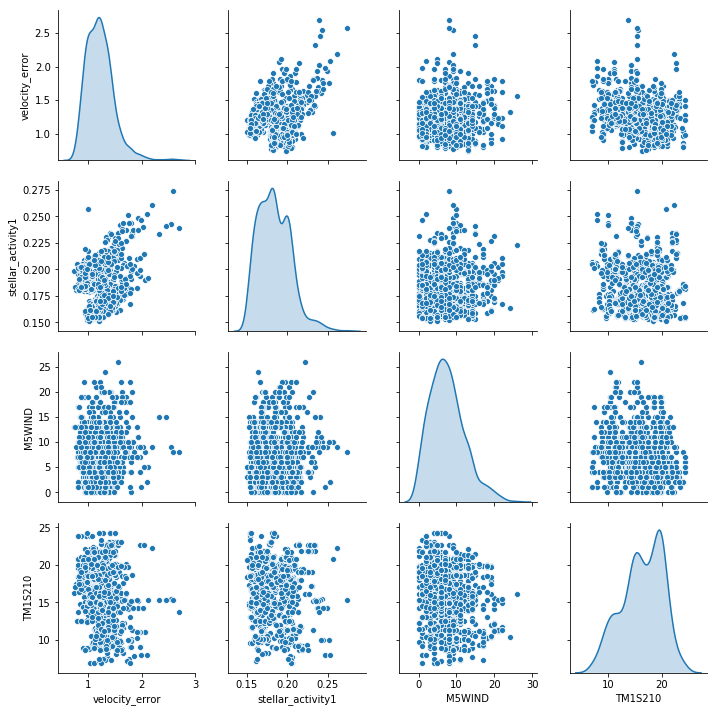

In [10]:
sns.pairplot(train_dataset[["velocity_error", "stellar_activity1", "M5WIND", "TM1S210"]], diag_kind="kde")

In [4]:
train_stats = train_dataset.describe()
train_stats.pop("velocity_error")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
velocity,1050.0,5.462857e-02,2.704020e+00,-1.053000e+01,-1.562500e+00,2.150000e-01,1.830000e+00,7.690000e+00
stellar_activity1,1050.0,1.844568e-01,1.970618e-02,1.508000e-01,1.692000e-01,1.828000e-01,1.986000e-01,2.738000e-01
brad_doesnt_know,1050.0,3.752390e+02,3.666226e+02,1.000000e+01,7.625000e+01,2.480000e+02,5.157500e+02,1.200000e+03
total_counts,1050.0,3.207798e+04,1.391866e+04,3.964000e+03,2.173300e+04,2.986300e+04,4.533325e+04,7.093900e+04
AZ,1050.0,3.900979e+01,6.494393e+01,-2.674620e+01,-6.864550e+00,2.008135e+01,2.633688e+01,2.286599e+02
EL,1050.0,4.141326e+01,1.245910e+01,1.680620e+01,3.017230e+01,4.134795e+01,5.405327e+01,5.831270e+01
AZENCPOS,1050.0,-6.299645e+07,7.677065e+07,-1.407479e+08,-1.172081e+08,-8.537254e+07,-7.797911e+07,1.612007e+08
ELENCPOS,1050.0,-4.340606e+07,1.472169e+07,-7.246497e+07,-5.668306e+07,-4.347266e+07,-2.847130e+07,-2.341716e+07
AZENCVEL,1050.0,2.847838e+02,2.819158e+03,-3.648000e+03,-2.133750e+03,-9.300000e+01,1.432000e+03,6.059000e+03
ELENCVEL,1050.0,6.785790e+02,1.463246e+03,-2.993000e+03,-7.242500e+02,1.197000e+03,1.656000e+03,3.487000e+03


In [0]:
train_labels = train_dataset.pop('velocity_error')
test_labels = test_dataset.pop('velocity_error')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [8]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [9]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.05874155],
       [-0.8954494 ],
       [-0.87184453],
       [-0.9975909 ],
       [-0.6954492 ],
       [-1.6611936 ],
       [-0.48427945],
       [-1.3317946 ],
       [-0.25518012],
       [-0.8927574 ]], dtype=float32)

In [19]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.000503,0.017516,0.000503,0.024953,0.107786,0.024953,995
996,0.000459,0.015757,0.000459,0.024471,0.106141,0.024471,996
997,0.000445,0.016193,0.000445,0.024567,0.104759,0.024567,997
998,0.000483,0.016763,0.000483,0.024571,0.106646,0.024571,998
999,0.000394,0.015173,0.000394,0.024892,0.106936,0.024892,999


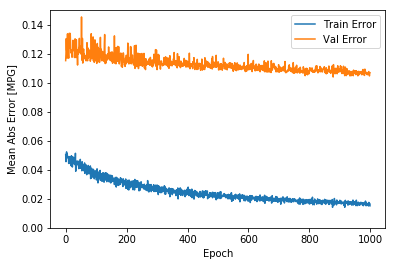

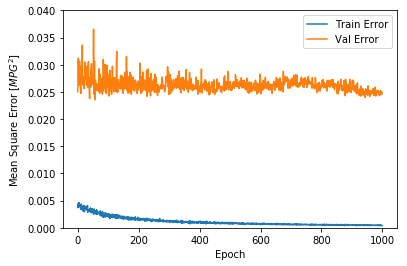

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0, 0.150])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0, 0.04])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................

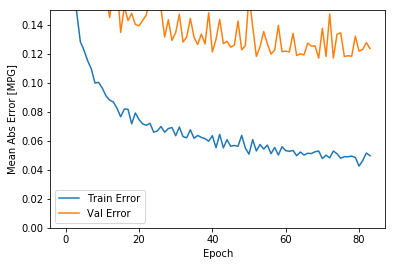

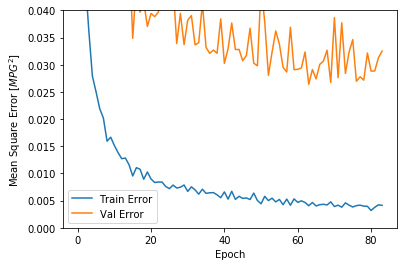

In [22]:
model = build_model()

EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print('velocity_error: mean = {}; std = {}'.format(train_labels.mean(), train_labels.std()))
print(mae)

262/262 - 0s - loss: 0.0217 - mean_absolute_error: 0.1096 - mean_squared_error: 0.0217
velocity_error: mean = 1.226752380952382; std = 0.25316269372450806
0.10962385


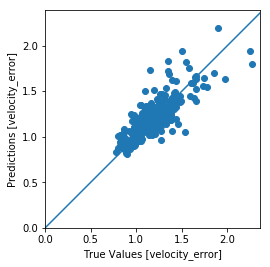

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [velocity_error]')
plt.ylabel('Predictions [velocity_error]')
plt.axis('equal'); plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

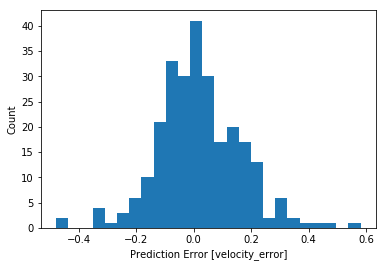

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [velocity_error]")
_ = plt.ylabel("Count")